In [5]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np

In [20]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v0/'

In [161]:
maintab = Table.read(tabledir+'vf_north_v0_main.fits')
hatab = Table.read(tabledir+'vf_north_v0_ha.fits')
hltab = Table.read(tabledir+'vf_north_v0_hyperleda.fits')
nsatab = Table.read(tabledir+'vf_north_v0_nsa.fits')
nsa0tab = Table.read(tabledir+'vf_north_v0_nsa_v0.fits')
plotdir = '/home/rfinn/research/Virgo/plots/'

In [94]:
len(hatab)

6860

# catalog statistics #

In [162]:
print('number with HL data = ',sum(maintab['HLflag']))
print('fraction with HL data = ',sum(maintab['HLflag'])/len(maintab))

number with HL data =  6619
fraction with HL data =  0.964868804664723


In [22]:
radec = (maintab['RA'] > 192.) & (maintab['RA'] < 209) & (maintab['DEC']> 0.) & (maintab['DEC'] < 50.) 
radec_flag = radec & (maintab['DEC'] >(2*(maintab['RA'] - 205.) + 20) ) & (maintab['DEC'] < (2*(maintab['RA'] - 205.) + 55))
filament = radec_flag & (maintab['vr'] >2000.) & (maintab['vr'] < 3238.)

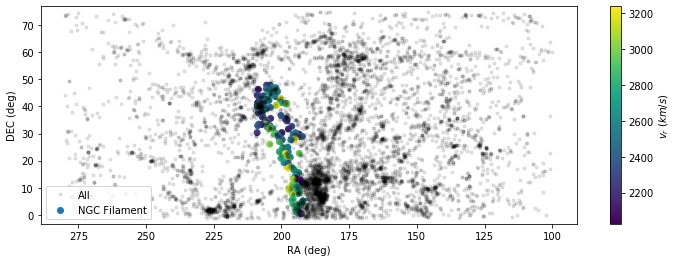

In [110]:
plt.figure(figsize=(12,4))
plt.plot(maintab['RA'],maintab['DEC'],'k.',alpha=.1,label='All')
plt.scatter(maintab['RA'][filament],maintab['DEC'][filament],c=maintab['vr'][filament],label='NGC Filament')
plt.gca().invert_xaxis()
plt.legend()
cb = plt.colorbar(label='$v_r \ (km/s)$')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.axis('equal')
plt.savefig(plotdir+'vf_ngcfilament.png')

# Number of NGC Galaxies with Halpha Data#

In [26]:
ngchaflag = (hatab['haflag'] & filament)
print(sum(ngchaflag))

62


In [112]:
# number of CO galaxies with Halpha
nCO = sum(filament & maintab['COflag'])
nCO_ha = sum(ngchaflag & maintab['COflag'])
print('number of galaxies in the filament = ',sum(filament))
print('number of CO galaxies in the filament = ',nCO)
print('number of CO galaxies w/ha in the filament = ',nCO_ha)
print('percent of CO sources w/ha = {:.1f}'.format(nCO_ha/nCO*100))

number of galaxies in the filament =  260
number of CO galaxies in the filament =  47
number of CO galaxies w/ha in the filament =  35
percent of CO sources w/ha = 74.5


In [78]:
hatab

VFID,RA,DEC,vr,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,NED,RA_ha,DEC_ha,Vr,CO,HI,Halpha,Pointing,Date Obs,Date Obs2,Alt Point,Date Obs3,Filament,Group,Telescope,filter,Dithers,R expt (s),Halpha expt (s),R expt tot,Halpha exp tot,R FWHM (iraf),R FWHM,Ha4 FWHM (iraf),Ha4 FWHM,haflag
bytes8,float32,float32,float32,bytes28,int32,int64,int64,bytes30,bool,bool,bool,bool,bytes12,float64,float64,float64,int64,int64,int64,bytes14,bytes10,bytes10,bytes6,bytes10,int64,int64,bytes9,bytes8,int64,int64,bytes13,int64,int64,float64,float64,float64,float64,bool
VFID0000,185.86877,74.95225,1418.8,NGC4363,0,0,0,NGC 4363,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0001,182.208,74.904274,1331.5,NGC4133,0,0,0,NGC 4133,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0002,145.94466,74.85958,3049.4,NGC2977,0,0,0,NGC 2977,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0003,185.57309,74.83839,1833.0,PGC040048,0,0,0,CGCG 352-030,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0004,182.82774,74.80822,1683.0,UGC07189,0,0,0,UGC 07189,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0005,173.13419,74.62754,1920.1,NGC3752,0,0,0,NGC 3752,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0006,121.91241,74.58463,2333.0,UGC04202,0,0,0,UGC 04202,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0007,118.2363,74.57653,2346.0,PGC022064,0,0,0,KUG 0746+747,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0008,274.94318,74.56839,1484.5,NGC6643,0,0,0,NGC 6643,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False


In [81]:
t = hatab['VFID','NSAIDV0','Date Obs','Pointing','Date Obs2','Telescope'][ngchaflag]
t.write('/home/rfinn/research/Virgo/Halpha/ngcfilament_halpha.fits',format='fits')

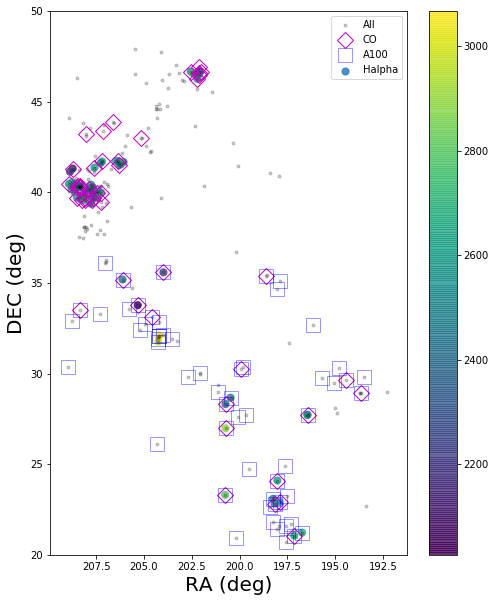

In [107]:
plt.figure(figsize=(8,10))
plt.plot(maintab['RA'][filament],maintab['DEC'][filament],'k.',alpha=.2,label='All')
plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
# plot CO sources
flag = filament & maintab['COflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
flag = filament & maintab['A100flag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
cb = plt.colorbar()
plt.legend()#label='vr (km/s)')
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.ylim(20,50)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCfilament.png')

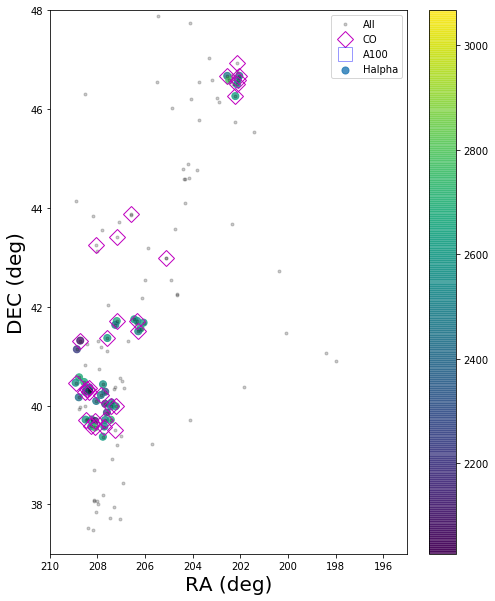

In [108]:
plt.figure(figsize=(8,10))
plt.plot(maintab['RA'][filament],maintab['DEC'][filament],'k.',alpha=.2,label='All')
plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
# plot CO sources
flag = filament & maintab['COflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
flag = filament & maintab['A100flag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
cb = plt.colorbar()
plt.legend()#label='vr (km/s)')

plt.axis([195,210,37,48])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCgroup.png')

# Identifying Filament Galaxies using Supergalactic Coordinates #

- We have a new table from Gianluca that includes SGX, SGY, SGZ coordinates for each galaxy.
- We can use the information in Kim+2016 paper to identify NGC filament galaxies based on SG coordinates.
- Compare this to selecting NGC filament galaxies based on RA, DEC, and vr.
- table is called: vf_north_v0_main_env_prop_H0_74_0.fits
- According to Kim+2016, the NGC filament is located between

| SG Coord | Min | Max |
|----------|-----|-----|
| SGX | -16.04 | 4.23 |
| SGY | 21.71| 26.53 |
| SGZ | -1.19 | 8.92 |

In [116]:
envtab = Table.read(tabledir+'vf_north_v0_main_env_prop_H0_74_0.fits')

In [129]:
xflag = (envtab['SGX'] > -16.04) & (envtab['SGX'] < 4.23) 
yflag = (envtab['SGY'] > 21.71) & (envtab['SGY'] < 26.53) 
zflag = (envtab['SGZ'] > -1.19) & (envtab['SGZ'] < 8.92) 
filament2 = xflag & yflag & zflag

In [133]:
print('number of galaxies in the filament = ',sum(filament2))
print('number of NGC galaxies w/CO = ',sum(filament2 & maintab['COflag']))
print('number of NGC galaxies w/Halpha = ',sum(filament2 & hatab['haflag']))

number of galaxies in the filament =  125
number of NGC galaxies w/CO =  1
number of NGC galaxies w/Halpha =  0


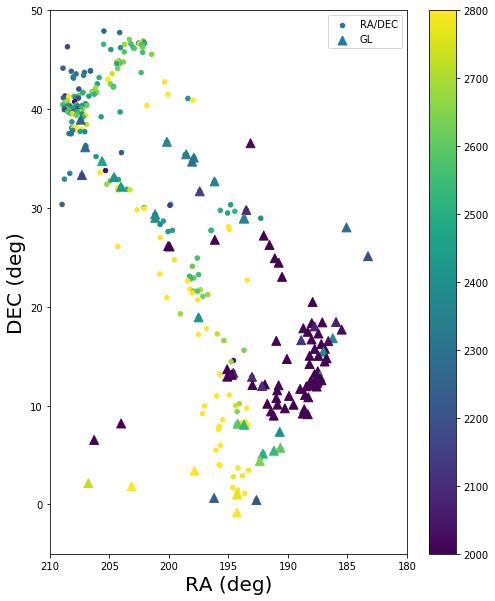

In [157]:
plt.figure(figsize=(8,10))
plt.scatter(maintab['RA'][filament],maintab['DEC'][filament],c=maintab['vr'][filament],s=20,vmin=2000,vmax=2800,label='RA/DEC')
plt.scatter(maintab['RA'][filament2],maintab['DEC'][filament2],c=maintab['vr'][filament2],marker='^',s=80,vmin=2000,vmax=2800,label='GL')
#plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
## plot CO sources
#flag = filament & maintab['COflag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
#flag = filament & maintab['A100flag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
plt.legend()
cb = plt.colorbar()
#plt.legend()#label='vr (km/s)')
plt.axis([180,210,-5,50])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
#plt.ylim(20,50)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCfilament-GLcomparison.png')

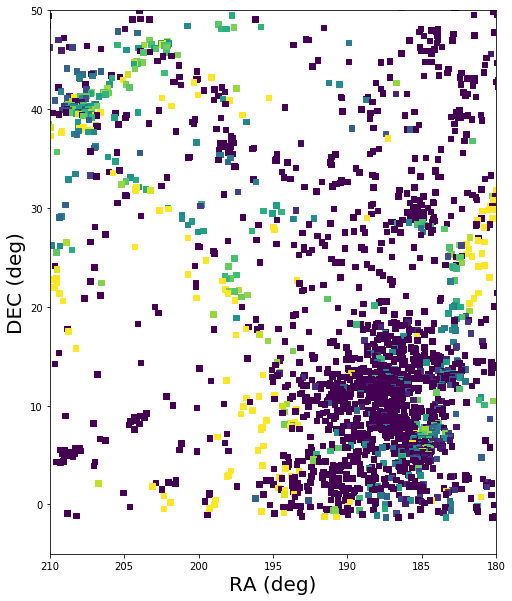

In [146]:
plt.figure(figsize=(8,10))
plt.scatter(maintab['RA'],maintab['DEC'],c=maintab['vr'],marker='s',s=30,vmin=2000,vmax=2800)
#plt.scatter(maintab['RA'][filament2],maintab['DEC'][filament2],c=maintab['vr'][filament2],vmin=2000,vmax=2800)
#plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
## plot CO sources
#flag = filament & maintab['COflag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
#flag = filament & maintab['A100flag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
#cb = plt.colorbar()
#plt.legend()#label='vr (km/s)')
plt.axis([180,210,-5,50])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
#plt.ylim(20,50)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCfilament-GLcomparison.png')

In [150]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequen

# Size measure to pass into legacy survey photometry#



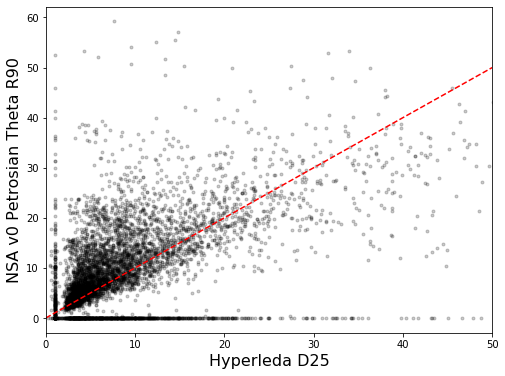

In [178]:
plt.figure(figsize=(8,6))
x = 10**hltab['logd25']
y = nsa0tab['PETROTH90']
plt.plot(x,.4*y,'k.',alpha=.2)
plt.xlabel('Hyperleda D25',fontsize=16)
plt.ylabel('NSA v0 Petrosian Theta R90',fontsize=16)
plt.xlim(0,50)
x1,x2 = plt.xlim()
xl = np.linspace(x1,x2,100)
plt.plot(xl,xl,'r--')


In [179]:
# select galaxies with a valid D25
d25_flag = hltab['e_logd25'] != 0
no_radius_flag = ~d25_flag & ~maintab['NSAV0flag']
print(sum(no_radius_flag))

49


In [180]:
sum(maintab['NSAflag'][no_radius_flag])

39

In [181]:
a100_only = maintab['A100flag'] & ~maintab['HLflag'] & ~maintab['NSAflag'] & ~maintab['NSAV0flag']
sum(a100_only)

9

Make a size array that  uses
- logD25 if it exists
- size from NSA V0, if it exists
- size from NSA V1, if it exists
- size from A100 sdss catalog (petroR90_r)

We expect 1 galaxy to have no size estimate 
- identify this galaxy
- print its RA, DEC
- look it up in the legacy viewer or sdss finding chart tool